# How to make good plots

Information, that is imperfectly acquired, is generally as imperfectly retained; and a man who has carefully investigated a printed table, finds, when done, that he has only a very faint and partial idea of what he has read ... On inspecting any one of these Charts attentively, a sufficiently distinct impression will be made, to remain unimpaired for a considerable time, and the idea which does remain will be simple and complete, at once including the duration and the amount

William Playfair, 1786

Sources:
* The Visual Display of Quantitative Information, Tufte
* [Ten Simple Rules for Better Figures](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)
* [Picking a color scale](https://betterfigures.org/2015/06/23/picking-a-colour-scale-for-scientific-graphics/)
* [Detailed Color Advice](https://medium.com/@Elijah_Meeks/color-advice-for-data-visualization-with-d3-js-33b5adc41c90)

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Integrity

* Don't display 1 dimensional data in 2 or 3 dimensions (or don't display n in m > n dimensions). The length of the bottom dollar is 44% the size of the top one but the area is ~20% the size and that is what we see.
![image.png](2d.png)

* Be reasonable with the size of the axes. These show the same information but give significant different imporessions. Note that the first one also doesn't use inflation adjusted dollars. This is "design variation" - a certain point on the right at the same height is not the same as a certain point on the left. ![image.png](tall.png) ![image.png](wide.png)

* Don't quote data out of context. This plot gives us no idea about 1) the natural year over year variance, 2) whether this is just a continuation of a trend, 3) what changed in similar regions at the same time, 4) other relevant changes (population?). It just invites us to accept their explanation. With context it turns out that 1955 was actually just a particularly bad year and 1956 is still > than 1954. ![image.png](no_context.png)

# Draw attention to the sense + substance of the data

*Above all else show the data.* Tufte

On a plot compare the amount of ink necessary to show the data to the total ink used. With this we can create the data ink ratio which is the proportion of ink devoted to the display of non redundant information.

Some principles:
* Maximinze the data ink ratio (within reason)
* Erase non data ink (within reason)
* Erase redundant data ink (within reason)

Compare these two plots. The first contains those crosses that get in the way of the data points. Removing them gives room to add extra data in the labels.

![image.png](low_data_ink_ratio.png) ![image.png](high_data_ink_ratio.png)

Non data ink (or chartjunk) that can be erased or muted includes:
* Grid lines - make thin and gray (if needed for e.g. corner plots) or just use ticks
* [Moire effects](https://en.wikipedia.org/wiki/Moir%C3%A9_pattern) - remove or replace with shading.
* Self-promoting graphics - anything that is there just to make people look at it is probably not adhering to the first principle.

# Colours

* Avoid having reddy/orange and green on a plot. Also blue and purple (because the red component of purple is not seen so it looks blue). 10%  ![image](colourblind.png)
* Warm colours will appear to be in the foreground so people will focus on those. ![image](warm_vs_cold.jpg)
* Keep the number of colours to a minimum (2-3ish). If you need more contrast consider using different alphas or line styles.
* Keep secondary areas black/grey.

In [colormaps](https://betterfigures.org/2015/06/23/picking-a-colour-scale-for-scientific-graphics/):
* Use sequential gradients to show an intensity (e.g. low accretion -> yellow, high accretion -> red)
* Use diverging colormaps to show a departure from a reference value (e.g. democrat republican vote percentage)
* Use categorical colormaps for categories (e.g. coloring an astronomical image for different categories of objects like stars, galaxies, supernova)
* **Don't** use a rainbow colormap (differences between some colors will be larger than others, colorblindness)

How do we do this considering the default maplotlib colors look like... a bunch of reds, greens and oranges...

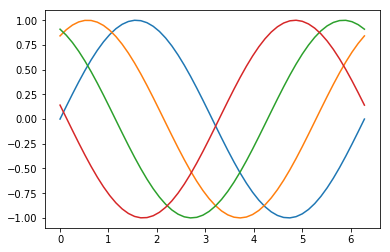

In [10]:
_, ax = plt.subplots()

for i in range(4):
    x = np.linspace(0, 2*np.pi)
    y = np.sin(x + i) 
    ax.plot(x, y)

* [Colorgorical](http://vrl.cs.brown.edu/color) is pretty good, though has limited palettes
* [viz-palette](https://projects.susielu.com/viz-palette) is awesome